In [27]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
# top directory
param_dir = '/glade/work/afoster/FATES_calibration/parameter_files'

# excel file with information about parameters
param_list_name = "param_list_sci.1.81.1_api.38.0.0.xls"

# list of parameters to include in OAAT ensemble
oaat_params_file = 'oaat_params.csv'

In [40]:
# get files
param_list_file = os.path.join(param_dir, param_list_name)

# get list of parameters for OAAT experiment
oaat_params = pd.read_csv(os.path.join(param_dir, oaat_params_file))['fates_parameter_name'].values

In [76]:
# information about the parameters - only ones we included in OAAT
param_dat = pd.read_excel(param_list_file)
param_dat = param_dat[param_dat['calibrate'] == 'Y']

In [77]:
# count up totals
fates_param_counts_total = (param_dat.groupby(['category', 'subcategory']).size().reset_index(name='num'))

In [70]:
# custom fill colors and labels for categories
category_colors = {
    'hydrology': '#104E8B',
    'biophysics': '#8B008B',
    'stomatal': '#008B00',
    'biogeochemistry': '#8B5A2B',
    'land use': '#FFA500',
    'fire': '#B22222'
}

category_labels = {
    'hydrology': 'Hydrology',
    'biophysics': 'Biophysics',
    'stomatal': 'Stomatal Conductance & \nPhotosynthesis',
    'biogeochemistry': 'Biogeochemistry',
    'land use': 'Land Use',
    'fire': 'Fire'
}
subcategory_labels = {
    'fire': 'Fire',
    'land use': 'Land use',
    'allocation': 'Allocation',
    'allometry': 'Allometry',
    'decomposition': 'Decomposition',
    'mortality': 'Mortality',
    'nutrient uptake': 'Nutrient uptake',
    'phenology': 'Phenology',
    'recruitment': 'Recruitment',
    'respiration': 'Respiration',
    'vegetation dynamics': 'Vegetation dynamics',
    'acclimation': 'Acclimation',
    'photosynthesis': 'Photosynthesis',
    'vegetation water': 'Vegetation water',
    'latent': 'Sensible and latent heat',
    'radiation': 'Radiation',
    'soil water': 'Soil hydraulics'
}
fates_param_counts_total['subcategory_label'] = fates_param_counts_total['subcategory'].map(subcategory_labels)

In [90]:
subcategory_order = ['Fire', 'Land use', 'Allocation', 'Allometry', 'Decomposition',
                     'Mortality', 'Nutrient uptake', 'Phenology', 'Recruitment',
                     'Respiration', 'Vegetation dynamics', 'Acclimation',
                     'Photosynthesis', 'Vegetation water', 'Sensible and latent heat', 'Radiation',
                     'Soil hydraulics']
subcategory_order.reverse()

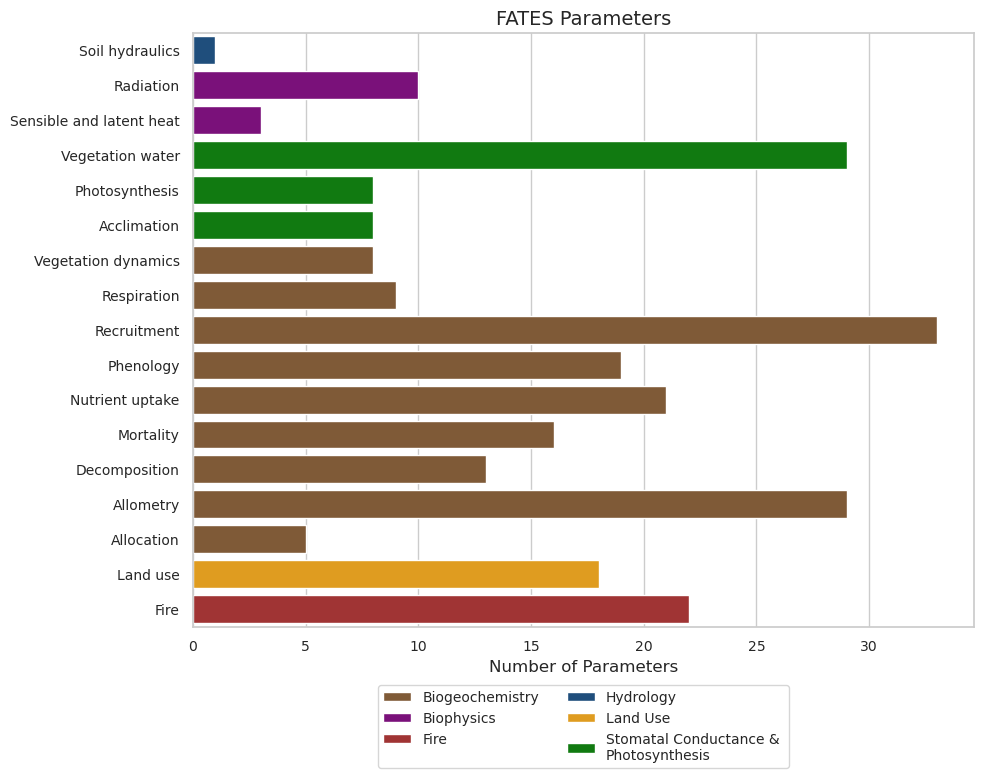

In [99]:
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'DejaVu Sans'],  # DejaVu Sans is always available
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10
})

ax = sns.barplot(
    data=fates_param_counts_total,
    y='subcategory_label',
    x='num',
    hue='category',
    palette=category_colors,
    order=subcategory_order
)

ax.set_xlabel('Number of Parameters')
ax.set_ylabel('')
ax.set_title('FATES Parameters')

handles, labels = ax.get_legend_handles_labels()
new_labels = [category_labels[label] for label in labels]
ax.legend(
    handles=handles,
    labels=new_labels,
    title=None,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.25),
    ncol=2
)

plt.tight_layout()
plt.show()